## Welcom to our research on Covid-19!
Group Members: Chris Fang, Die Hu
### Motivation
When disaster strikes, many scientists will try to figure out what is going on. In these months, COVID-19 Coronavirus outbreak shocked the world with an extreme change in lifestyle. Starting in December, coronavirus hitted the world whitout any alarm. Unlike other diseas, coronavirus with its extraordinary infection rate impacts life in 210 countries in just 4 months with over 3 millions cases. Under this unprecedented situation, everyone in the society is taking different roles to fight this battle. Government has enforced state-at-home order to slow down the infections while medical staff has been striving to cure as many patients as they could. On the other side, many scientists from the back end are trying to correlate the diseases with other factors hoping to help prevent the spread. Until this point, it would be interesting to look into the result of their efforts and even compare by location to see which states have done a better job.

### Introduction
There are ***3*** sections in this project including Data Description, Data Summary, Data analysis(Exploratory Analysis Findings, Deeper Analysis, Interpretation/Discussion,Conclusion). In the data danlysis process, we will interate the sub-sections for each research questions. There are 3 research questions in this study:
- Q1. Does death ratio have significant different in these two states?

- Q2. Does the staty-home policy have effect on cases?

- Q3. Does temperature correlate with the cases?

### Section 1: Data Description
3 datasets are used in this study:
- us-states.csv: this dataset is from GitHub. It records the confirmed cases by day for each states. There are 2984 rows and 5 columns. Each row represents the case record of a day.
> _date_ (0 missing values): Day of the record.
> <br> _state_ (0 missing values): String State of the record.
> <br> _fips_ (0 missing values): Numeric and two-letter alphabetic codes defined in U.S. Federal Information Processing Standard Publication ("FIPS PUB") 5-2 to identify U.S. states and certain other associated areas.
> <br> _cases_ (0 missing values): Number of confirmed Covid-19 cases of the day.
> <br> _deaths_ (0 missing values): Number of deaths of the day.
- caweather.csv: this dataset is from NOAA. It contains daily weather data (wind speed and average temperature) in - California from 1/1/2020 to 4/23/2020. There are 115896 rows and 5 columns. Each row represents the weather record of a day in California.
> _STATION_ (0 missing values): String code of the weather detector.
> <br> _NAME_ (0 missing values): String name of the station.
> <br> _DATE_ (0 missing values): Date of the record.
> <br> _AWND_ (107304 missing values): Numeric Average wind speed of the day.
> <br> _TAVG_ (80391 missing values): Numeric Average temperature of the day,
- nyweather.csv: this dataset is from NOAA. It contains daily weather data (wind speed and average temperature) in New York from 1/1/2020 to 4/23/2020. There are 48140 rows and 5 columns. Each row represents the weather record of a day in New York.
> _STATION_ : String Code of the weather detector.
> <br> _NAME_ (0 missing values): String Name of the station.
> <br> _DATE_ (0 missing values): Date of the record.
> <br> _AWND_ (44661 missing values): Numeric Average wind speed of the day.
> <br> _TAVG_ (46544 missing values): Numeric Average temperature of the day,

### Section 2: Data Summary

In [40]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import pandas as pd

In [41]:
usdata = pd.read_csv('us-states.csv')
nyweather= pd.read_csv('nyweather.csv')
caweather = pd.read_csv('caweather.csv')

In [42]:
##Data summary for usdata dataset.
usdata.describe()

fips          cases        deaths
count  2984.000000    2984.000000   2984.000000
mean     31.293231    5201.836796    215.913204
std      18.298512   20091.289962   1059.190936
min       1.000000       1.000000      0.000000
25%      17.000000      23.000000      0.000000
50%      31.000000     423.500000      7.000000
75%      46.000000    2662.750000     75.000000
max      78.000000  282174.000000  16599.000000

In [43]:
##Data summary for nyweather dataset.
nyweather.describe()

AWND         TAVG
count  3479.000000  1596.000000
mean      8.422515    36.536341
std       4.401341     9.947098
min       0.000000     2.000000
25%       5.370000    31.000000
50%       7.830000    37.000000
75%      10.740000    43.000000
max      29.080000    61.000000

In [44]:
##Data summary for caweather dataset.
caweather.describe()

AWND          TAVG
count  8592.000000  35505.000000
mean      6.012682     45.535277
std       3.487154     10.071902
min       0.000000      4.000000
25%       3.580000     38.000000
50%       5.140000     46.000000
75%       7.610000     53.000000
max      26.620000     85.000000

### Section 3: Data analysis (3 research questions)
- Section 3.1 Data Cleanning 
- Section 3.2 Exploratory Analysis Findings
- Section 3.3 Deeper Analysis
- Section 3.4 Interpretation and Conclusion

### Research Question 1: Does death ratio have significant differences in these two states?
#### Section 3.1 - Data Cleanning
In this process, we filter out the null values and relevant data for both weather and case datasets. In order for the dates to align, we limit the dates range from 3/1/2020 to 4/21/2020 for both New York and California datasets. We also merge the data information with the case datasets to facilitate the analysis process.

In [45]:
## Clean the 3 datasets to get rid of null values and filter out relevant data.
## 2 final datasets are generated: cadata, nydata.
nycases = usdata[usdata.state == 'New York']
nycases = nycases[:-4]
cacases = usdata[usdata.state == 'California']
nyweather = nyweather[(nyweather.AWND > 0) & (nyweather.STATION == 'USW00014732') ].drop(columns = ['STATION','NAME'])
caweather = caweather[(caweather.AWND > 0) & (caweather.STATION == 'USW00024216') ].drop(columns = ['STATION','NAME'])
nydata = nycases.merge(nyweather, left_on='date', right_on='DATE').drop(columns='DATE')
cadata = cacases.merge(caweather, left_on='date', right_on='DATE').drop(columns='DATE')
nydata.columns = map(str.lower, nydata.columns)
cadata.columns = map(str.lower, nydata.columns)
nydata['death rate'] = nydata['deaths'] / nydata['cases']
cadata['death rate'] = cadata['deaths'] / cadata['cases']
cadata = cadata[36:]
cadata = cadata.reset_index()
cadata

index        date       state  fips  cases  deaths   awnd  tavg  \
0      36  2020-03-01  California     6     33       0  19.01  53.0   
1      37  2020-03-02  California     6     38       0  12.30  56.0   
2      38  2020-03-03  California     6     45       0  10.29  65.0   
3      39  2020-03-04  California     6     55       1   5.37  64.0   
4      40  2020-03-05  California     6     67       1   6.49  58.0   
5      41  2020-03-06  California     6     81       1   6.26  56.0   
6      42  2020-03-07  California     6    100       1   7.61  53.0   
7      43  2020-03-08  California     6    112       1   4.47  50.0   
8      44  2020-03-09  California     6    172       2   5.14  51.0   
9      45  2020-03-10  California     6    179       3   9.84  56.0   
10     46  2020-03-11  California     6    202       4   4.70  60.0   
11     47  2020-03-12  California     6    252       4  11.18  60.0   
12     48  2020-03-13  California     6    320       5  14.54  64.0   
13     49  2020-03-14  California     6    381       5  14.76  55.0   
14     50  2020-03-15  California     6    478       6  11.86  47.0   
15     51  2020-03-16  California     6    588      11   5.14  45.0   
16     52  2020-03-17  California     6    732      14  10.07  46.0   
17     53  2020-03-18  California     6    893      17   3.36  45.0   
18     54  2020-03-19  California     6   1067      19   3.13  45.0   
19     55  2020-03-20  California     6   1283      24   4.70  50.0   
20     56  2020-03-21  California     6   1544      28   7.61  53.0   
21     57  2020-03-22  California     6   1851      35   5.59  56.0   
22     58  2020-03-23  California     6   2240      39  12.97  54.0   
23     59  2020-03-24  California     6   2644      52   9.17  51.0   
24     60  2020-03-25  California     6   3183      67   5.37  48.0   
25     61  2020-03-26  California     6   4060      82   4.70  46.0   
26     62  2020-03-27  California     6   4914     102   6.71  47.0   
27     63  2020-03-28  California     6   5565     121   7.61  53.0   
28     64  2020-03-29  California     6   6266     130   8.05  52.0   
29     65  2020-03-30  California     6   7421     146  14.99  56.0   
30     66  2020-03-31  California     6   8582     183  10.29  59.0   
31     67  2020-04-01  California     6   9816     212  10.96  55.0   
32     68  2020-04-02  California     6  11190     247  10.07  53.0   
33     69  2020-04-03  California     6  12569     282   6.49  54.0   
34     70  2020-04-04  California     6  13796     323  13.42  49.0   
35     71  2020-04-05  California     6  15076     349  18.34  52.0   
36     72  2020-04-06  California     6  16284     386   4.92  50.0   
37     73  2020-04-07  California     6  17540     447   5.82  54.0   
38     74  2020-04-08  California     6  19043     506   7.61  61.0   
39     75  2020-04-09  California     6  20191     548   6.71  58.0   
40     76  2020-04-10  California     6  21366     594   5.37  60.0   
41     77  2020-04-11  California     6  22421     632   6.49  62.0   
42     78  2020-04-12  California     6  23323     676   7.61  67.0   
43     79  2020-04-14  California     6  25758     778   7.83  62.0   
44     80  2020-04-15  California     6  27107     885   5.14  65.0   
45     81  2020-04-16  California     6  28142     971   9.17  66.0   
46     82  2020-04-17  California     6  29398    1050   8.28  66.0   
47     83  2020-04-18  California     6  30829    1146   6.93  60.0   
48     84  2020-04-19  California     6  31544    1176   5.14  61.0   
49     85  2020-04-20  California     6  33862    1223   5.37  58.0   
50     86  2020-04-21  California     6  35844    1316   3.80  60.0   

    death rate  
0     0.000000  
1     0.000000  
2     0.000000  
3     0.018182  
4     0.014925  
5     0.012346  
6     0.010000  
7     0.008929  
8     0.011628  
9     0.016760  
10    0.019802  
11    0.015873  
12    0.015625  
13    0.013123  
14    0.012552  
15    0.018707  
16    0.019126  
17   

#### Section 3.2 - Exploratory Analysis Findings
In this process we try to use histogram to compare how spread out the death rate is in California and New York.

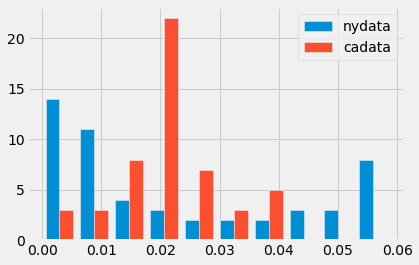

In [46]:
fig = plt.figure() 
ax = fig.add_subplot(111)
ax.hist([nydata['death rate'], cadata['death rate']], label=("nydata", "cadata"), bins=10)
ax.legend()

From the above graph, we can see that New York has death rate that is more spread out and tend to have lower death rate than California does. We would like to perform A/B test to verify this, and therefore the following hypothesis are made:
- Null hypothesis: There is no difference in average death rate between New York and California.
- Alternative hypothesis: Death rate in New York is lower than Califonia.

#### Section 3.3 - Deeper Analysis
As mentioned, we will use A/B testing to verify the hypothesis.

In [47]:
#Append all the data and assign ny as 1
alldata = nydata.append(cadata,ignore_index=True).drop(columns='index')
alldata.loc[alldata['state'] == 'New York', 'isny'] = 1
alldata.loc[alldata['state'] != 'New York', 'isny'] = 0
alldata

awnd  cases        date  death rate  deaths  fips       state  tavg  \
0    13.42      1  2020-03-01    0.000000       0    36    New York  32.0   
1    10.29      1  2020-03-02    0.000000       0    36    New York  45.0   
2     9.62      2  2020-03-03    0.000000       0    36    New York  53.0   
3    18.34     11  2020-03-04    0.000000       0    36    New York  51.0   
4    12.97     22  2020-03-05    0.000000       0    36    New York  46.0   
..     ...    ...         ...         ...     ...   ...         ...   ...   
98    8.28  29398  2020-04-17    0.035717    1050     6  California  66.0   
99    6.93  30829  2020-04-18    0.037173    1146     6  California  60.0   
100   5.14  31544  2020-04-19    0.037281    1176     6  California  61.0   
101   5.37  33862  2020-04-20    0.036117    1223     6  California  58.0   
102   3.80  35844  2020-04-21    0.036715    1316     6  California  60.0   

     isny  
0     1.0  
1     1.0  
2     1.0  
3     1.0  
4     1.0  
..    ...  
98    0.0  
99    0.0  
100   0.0  
101   0.0  
102   0.0  

[103 rows x 9 columns]

In [48]:
#Transfer from pandas dataframe to datascience and filter out the necessary column
alldatad = Table(make_array('awnd', 'cases', 'date','death rate','deaths','fips','state','tavg','isny'))
alldatad = alldatad.with_rows(alldata.to_numpy())
abtestdata = alldatad.select('state','death rate')
abtestdata

state    | death rate
New York | 0
New York | 0
New York | 0
New York | 0
New York | 0
New York | 0
New York | 0
New York | 0
New York | 0
New York | 0
... (93 rows omitted)

In [49]:
#Definition for average means
def difference_of_means(table, label, group_label):
    reduced = table.select(label, group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [50]:
#Simulation definitation
def one_simulated_difference(table, label, group_label):
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    shuffled_table = table.select(label).with_column(
        'Shuffled Label', shuffled_labels)
    return difference_of_means(shuffled_table, label, 'Shuffled Label')

In [51]:
#Permutation test
differences = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference(abtestdata, 'death rate', 'state')
    differences = np.append(differences, new_difference)
differences

array([ 3.05875028e-03, -7.42522471e-05, -8.77340509e-04, ...,
       -1.76175088e-04,  1.56703052e-03, -7.69234085e-04])

In [52]:
observed_means = abtestdata.group('state', np.average).column(1)
observed_difference = observed_means.item(1) - observed_means.item(0)

The p-value for this analysis is 0.3627
The observed means for this analysis is 0.0011390802294151611


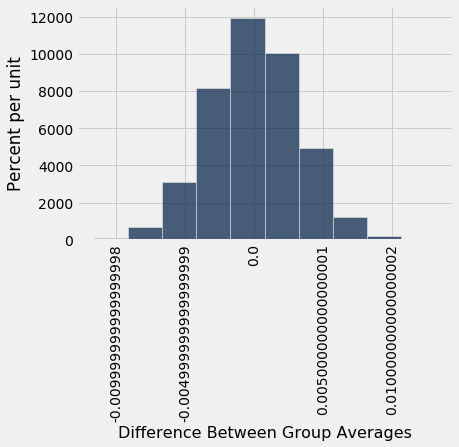

In [53]:
Table().with_column('Difference Between Group Averages', differences).hist()
empirical_P = np.count_nonzero(differences >= observed_difference) / 10000
print("The p-value for this analysis is %s" % empirical_P)
print("The observed means for this analysis is %s" % observed_difference)
#P value is greater than 0.05, we would not reject the null hypothesis. There is a chance we see 0 difference in both groups

#### Section 3.4 - Interpretation and Discussion
From the resulting histogram, we could see that differences clustered around 0 which makes sense because that is what our hypothesis is. Since p-value is also greater than 0.05, ***we could not reject the null hypothesis***. It means that it is very possible for New York and California have the same death rate.

<br> However, there might be other factors that influence the result:
- The case of the day might not accurately reflect the number of cases are discovered on that day because it might take CDC longer than a day to test.
- Both states start recording the cases from the first case. But in order to make the analysis easier, we set the start date at 3/1/2020. It might not be the first day of realized case.

### Research Question 2: Does the staty-home policy have effect on cases?
#### Section 3.1 - Data Cleanning
In this process, we realize CA has policy in effect on 3/19 while 3/22 for New York. For California, we are planning to use 30 days before and after the policy to compare the differences. For New York, we use 20 days before and after the policy to compare the differences due to missing data before 3/1/2020.


In [54]:
ca_before = cacases.set_index('date').loc['2020-02-19':'2020-03-19']
ca_before['before/after'] = 'before'
ca_after = cacases.set_index('date').loc['2020-03-19':'2020-04-19']
ca_after['before/after'] = 'after'
ny_before = nycases.set_index('date').loc['2020-03-02':'2020-03-22']
ny_before['before/after'] = 'before'
ny_after = nycases.set_index('date').loc['2020-03-22':'2020-04-12']
ny_after['before/after'] = 'after'

In [55]:
ca_before

state  fips  cases  deaths before/after
date                                                    
2020-02-19  California     6      7       0       before
2020-02-20  California     6      8       0       before
2020-02-21  California     6      9       0       before
2020-02-22  California     6      9       0       before
2020-02-23  California     6      9       0       before
2020-02-24  California     6     11       0       before
2020-02-25  California     6     11       0       before
2020-02-26  California     6     26       0       before
2020-02-27  California     6     26       0       before
2020-02-28  California     6     27       0       before
2020-02-29  California     6     28       0       before
2020-03-01  California     6     33       0       before
2020-03-02  California     6     38       0       before
2020-03-03  California     6     45       0       before
2020-03-04  California     6     55       1       before
2020-03-05  California     6     67       1       before
2020-03-06  California     6     81       1       before
2020-03-07  California     6    100       1       before
2020-03-08  California     6    112       1       before
2020-03-09  California     6    172       2       before
2020-03-10  California     6    179       3       before
2020-03-11  California     6    202       4       before
2020-03-12  California     6    252       4       before
2020-03-13  California     6    320       5       before
2020-03-14  California     6    381       5       before
2020-03-15  California     6    478       6       before
2020-03-16  California     6    588      11       before
2020-03-17  California     6    732      14       before
2020-03-18  California     6    893      17       before
2020-03-19  California     6   1067      19       before

#### Section 3.2 - Exploratory Analysis Findings
In this process we try to use line charts to compare before and after policy in effect for both states.

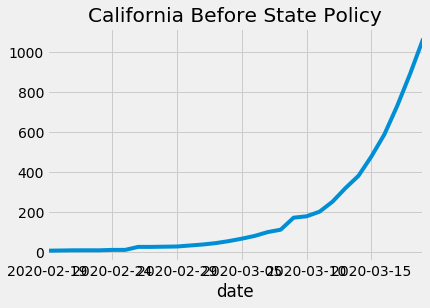

In [56]:
ca_before['cases'].plot.line(title = 'California Before State Policy')

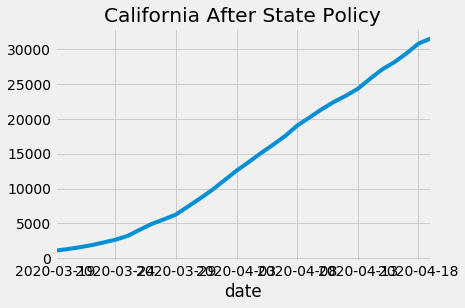

In [57]:
ca_after['cases'].plot.line(title = 'California After State Policy')

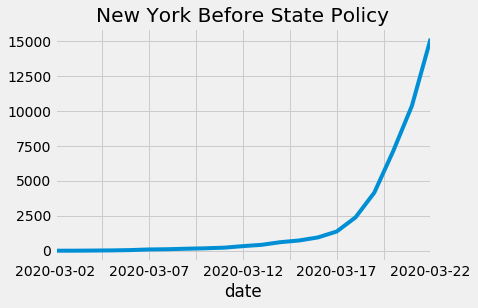

In [58]:
ny_before['cases'].plot.line(title = 'New York Before State Policy')

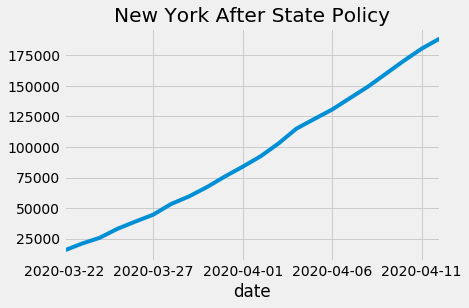

In [59]:
ny_after['cases'].plot.line(title = 'New York After State Policy')

From these line charts, we can see that both New York and California's confirmed cases trend went from exponential to constant increase on a daily basis. We might want to further look into whether there is differences in mean before and after the the policy is implemented. To answer this question, we would also use A/B testing for each state to compare before and after case differences in mean. Therefore we will make the follwing hypothesis:
- Null hypothesis: The average confirmed cases are the same before and after the policy is implemented.
- Alternative hypothesis: Confirmed cases increase/decrease after the policy is implemented.

#### Section 3.3 - Deeper Analysis
As mentioned, we will use A/B testing to verify the hypothesis.

In [60]:
#Append dataframes, transfer from pandas dataframe to datascience
capolicy = ca_before.append(ca_after).reset_index()
nypolicy = ny_before.append(ny_after).reset_index()
d_ca_policy = Table(make_array('date', 'state', 'fips','cases','death','before/after'))
d_ca_policy = d_ca_policy.with_rows(capolicy.to_numpy())
d_ca_policy = d_ca_policy.select('before/after', 'cases')
d_ny_policy = Table(make_array('date', 'state', 'fips','cases','death','before/after'))
d_ny_policy = d_ny_policy.with_rows(nypolicy.to_numpy())
d_ny_policy = d_ny_policy.select("before/after", 'cases')
d_ny_policy

before/after | cases
before       | 1
before       | 2
before       | 11
before       | 22
before       | 44
before       | 89
before       | 106
before       | 142
before       | 173
before       | 217
... (33 rows omitted)

In [61]:
#Reutilize the defined functions before and perform permutation test for New York
ny_differences = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference(d_ny_policy, 'cases', 'before/after')
    ny_differences = np.append(ny_differences, new_difference)
ny_differences

array([ -2744.34848485,    886.73160173, -29109.86363636, ...,
         6113.65151515, -12311.75541126,  18291.4004329 ])

In [62]:
#Reutilize the defined functions before and perform permutation test for California
ca_differences = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference(d_ca_policy, 'cases', 'before/after')
    ca_differences = np.append(ca_differences, new_difference)
ca_differences

array([ 1486.475     , -1673.00625   , -2765.5625    , ...,
        -991.91041667,  5187.74583333,   203.39791667])

The p-value for this analysis is 0.0
The observed means for this analysis is -92029.93939393939


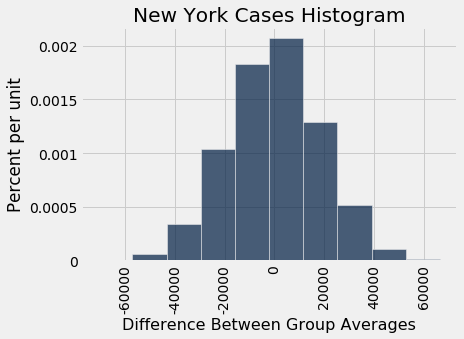

In [63]:
#New York
observed_means = d_ny_policy.group('before/after', np.average).column(1)
observed_difference = observed_means.item(1) - observed_means.item(0)
Table().with_column('Difference Between Group Averages', ny_differences).hist()
plt.title("New York Cases Histogram")
empirical_P = np.count_nonzero(ny_differences <= observed_difference) / 10000
print("The p-value for this analysis is %s" % empirical_P)
print("The observed means for this analysis is %s" % observed_difference)

The p-value for this analysis is 0.0
The observed means for this analysis is -13874.477083333333


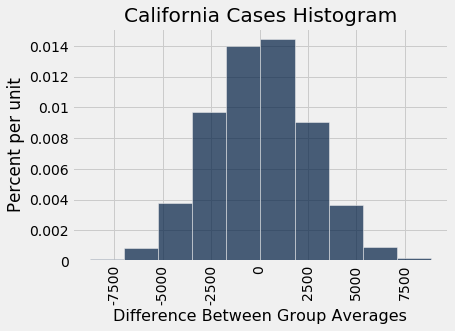

In [64]:
#California
observed_means = d_ca_policy.group('before/after', np.average).column(1)
observed_difference = observed_means.item(1) - observed_means.item(0)
Table().with_column('Difference Between Group Averages', ca_differences).hist()
plt.title("California Cases Histogram")
empirical_P = np.count_nonzero(ca_differences <= observed_difference) / 10000
print("The p-value for this analysis is %s" % empirical_P)
print("The observed means for this analysis is %s" % observed_difference)

#### Section 3.4 - Interpretation and Discussion
<font color = red>**Note: The Observed means are before minus after.**</font>
<br> From the resulting histograms, we could see that differences clustered around 0 which makes sense because that is what our hypothesis is. But, ***we could reject the null hypothesis because the p-value is very small***. It is very interesting to see the p-value as 0. It means that the exact chance of getting a difference in that range is not 0 but it is vanishingly small, and there is difference before and after the policy.


<br> However, there might be other factors that influence the result:
- The policy might not be the cause of the change in number of cases. It could just be the virus got spread out faster in general.
- It might need more data to support the effect of the policy. Number of confirmed cases might not be the best parameters since there are many confounds.

### Research Question 3: Does temperature correlate with the cases?
#### Section 3.1 - Data Cleanning
In this process, we will filter ourt average temperature data and confirmed cases of the day for both NY and CA.


In [65]:
ca_temp_case = Table(make_array('cases', 'tavg'))
ca_temp_case = ca_temp_case.with_rows(cadata[['cases','tavg']].to_numpy())
ny_temp_case = Table(make_array('cases', 'tavg'))
ny_temp_case = ny_temp_case.with_rows(nydata[['cases','tavg']].to_numpy())

#### Section 3.2 - Exploratory Analysis Findings
In this process we try to use line charts to compare before and after policy in effect for both states.

Text(0.5, 1.0, 'Average Temp VS Cases in California')

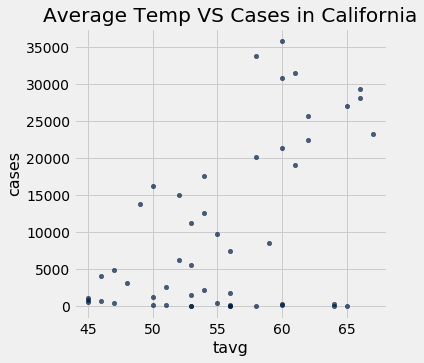

In [66]:
ca_temp_case.scatter('tavg','cases')
plt.title("Average Temp VS Cases in California")

Text(0.5, 1.0, 'Average Temp VS Cases in New York')

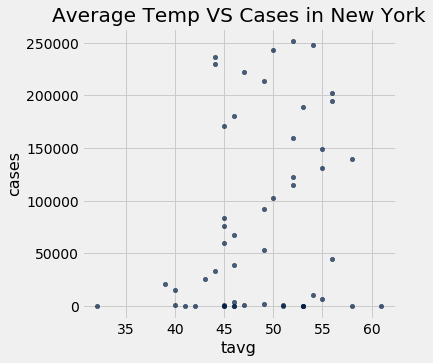

In [67]:
ny_temp_case.scatter('tavg','cases')
plt.title("Average Temp VS Cases in New York")

As shown in 2 graphs above, it seems like cases and average temperature has positive correlation in both NY and CA. It actually requires some numbers to support such realtionaship. We are thinking maybe correlation can give us the number of the association. We are also thinking regression maybe a good tool to predict cases based on average temperature. So we will perform correlation test and assess the validity of regression line in the next section. Before moving to next section, we will hypothesize there is positive correlation between temperature and cases since there are some researches support this hypothesis.

#### Section 3.3 - Deeper Analysis
As mentioned, we will do correlation test to find the correlation magnitude and assess the validity of regression line to see whether average temperature is a good predictor for the case increase.

In [68]:
#Definition of functions
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))


In [69]:
ca_cor = correlation(ca_temp_case,'tavg','cases')
ny_cor = correlation(ny_temp_case,'tavg','cases')
print('The correlation between average temperature and cases in California and New York are %s and %s respectively.' % (ca_cor, ny_cor))

The correlation between average temperature and cases in California and New York are 0.5174208146189956 and 0.23254682423385717 respectively.


It seems like both New York and California give positive correlation between average temperature and confirmed cases. However, this correlation number is very general and vague. We would want to look deeper into its regression line and risidual plot to investigate how this correlation reflects in the plot and whether regression line is an appropriate tool to help predict cases based on the average temperature of the day.

In [70]:
#Define functionss
def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b
def scatter_fit(table, x, y):
    table.scatter(x, y, s=15)
    plt.plot(table.column(x), fit(table, x, y), lw=4, color='gold')
    plt.xlabel(x)
    plt.ylabel(y)
def residual(table, x, y):
    return table.column(y) - fit(table, x, y)
def residual_plot(table, x, y):
    x_array = table.column(x)
    t = Table().with_columns(
            x, x_array,
            'residuals', residual(table, x, y)
        )
    t.scatter(x, 'residuals', color='r')
    xlims = make_array(min(x_array), max(x_array))
    plt.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plt.title('Residual Plot')
def regression_diagnostic_plots(table, x, y):
    scatter_fit(table, x, y)
    residual_plot(table, x, y)

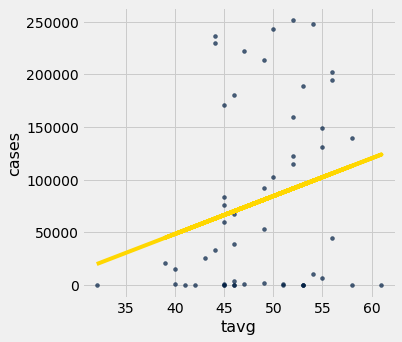

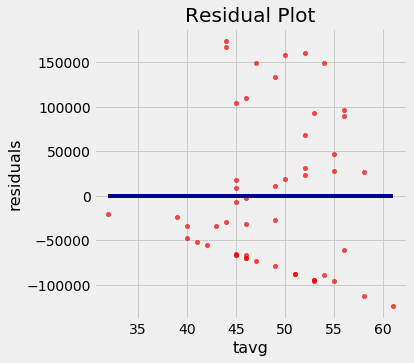

In [71]:
#New York scatter plot with regression line and residual plot
regression_diagnostic_plots(ny_temp_case,'tavg','cases')

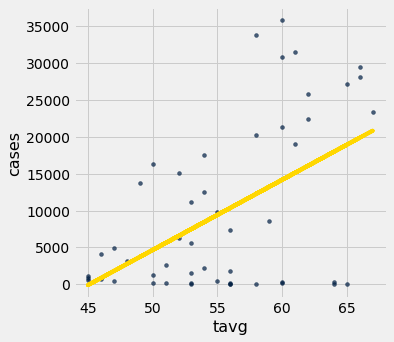

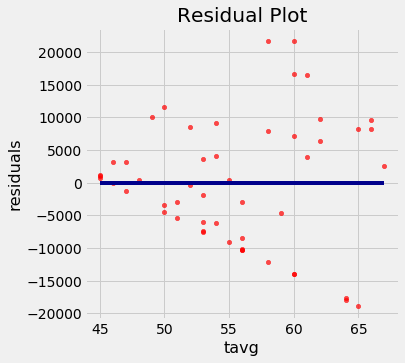

In [72]:
#California scatter plot with regression line and residual plot
regression_diagnostic_plots(ca_temp_case,'tavg','cases')

#### Section 3.4 - Interpretation and Discussion
<br> From the resulting plots, we could conlude that ***regression is probably not the best method for this estimation***. In both residual plots, the red points seem to have a pattern. The residuals are not distributed fairly symmetrically above and below the horizontal line at 0. The vertical spread does not even across different temperatures in the x-axis. 

<br> However, there might be some factors causing regression is not the best tool :
- Cases confirmed on certain day do not mean the patient catches the virus on that day
- The range of temperature is narrow, It can be not as convincing to analyze data within such small variety of independent variables.

<br> Since the current situation with COVID-19 is changing rapidly everyday as well as the datasets of COVID-19, future follow up with the new data when the pandemic is over and all the data is collected properly, the result will be more accurate and stable with more variables involved.

#### Citation:
1. Ani Adhikari, John DeNero, Computational and Inferential Thinking[codebook],Retrieved from 
https://www.inferentialthinking.com/chapters/15/5/Visual_Diagnostics.html.
2. Pydata.org, Pandas[python package], Retrieved from https://pandas.pydata.org/pandas-docs/stable/index.html.
3. University of Califronia Berkeley DS courses instructors, Datascience[python package], Retrieved from http://data8.org/datascience/.
4. The US Government, Past Weather by Zip Code - Data Table[datasets], Retrieved from https://www.climate.gov/maps-data/dataset/past-weather-zip-code-data-table.
5. NYC Health, COVID-19: Data[datasets], Retrieved from https://www1.nyc.gov/site/doh/covid/covid-19-data.page.
6. The Califronia State Health, california-covid-19-hospital-data-and-case-statistics[datasets], Retrieved from https://data.chhs.ca.gov/dataset/california-covid-19-hospital-data-and-case-statistics.